In [1]:
#getting the required libreries
import math
import pandas as pd
import seaborn as sns
import numpy as np
from io import StringIO 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot
import cufflinks as cf
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
print(wine.shape)
wine.head(100)

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
#Data Cleaning begins...
wine.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
wine.duplicated().sum()

0

In [7]:
# col = 'ash'
# if col in wine.columns:
#     print(wine[col].unique())
# else:
#     print("no such column exists in Dataset!")

In [8]:
def getValueCounts(ds,col):
    if col in ds.columns:
        return ds[col].value_counts()
    else:
        return []

In [9]:
column_valueCounts = getValueCounts(wine,'Wine')
print(column_valueCounts)

2    71
1    59
3    48
Name: Wine, dtype: int64


In [10]:
wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


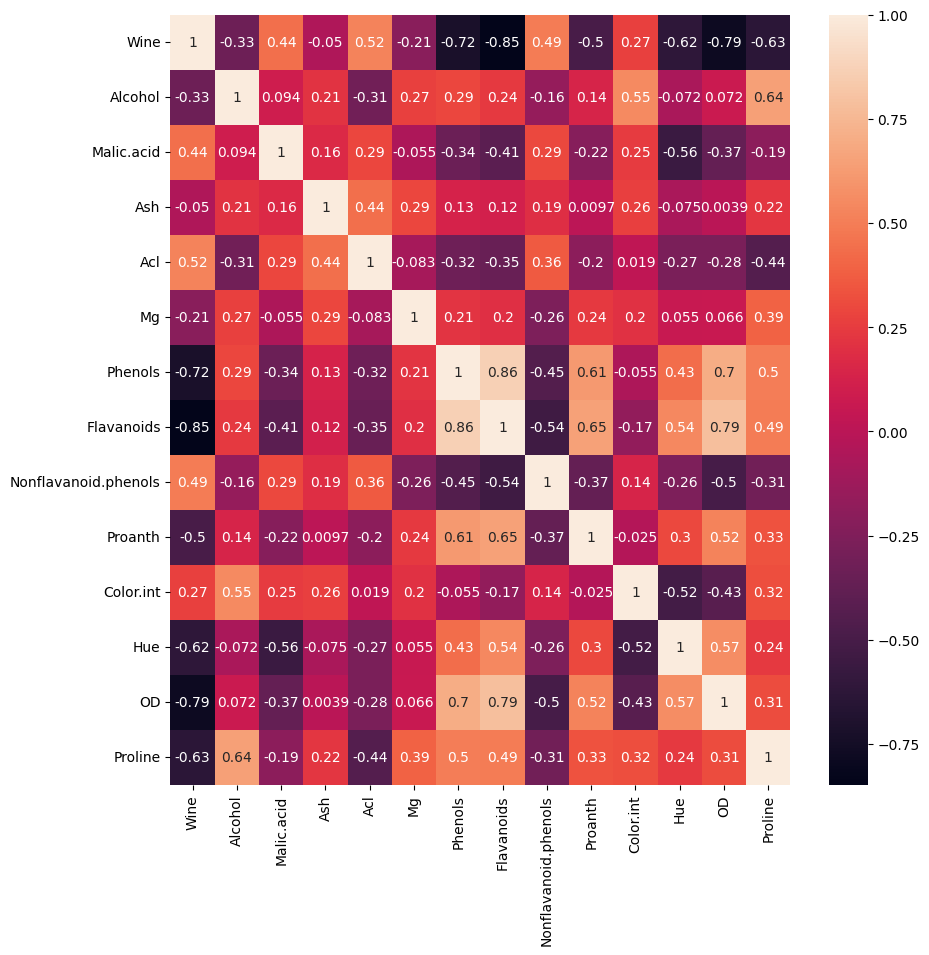

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True)
plt.show()

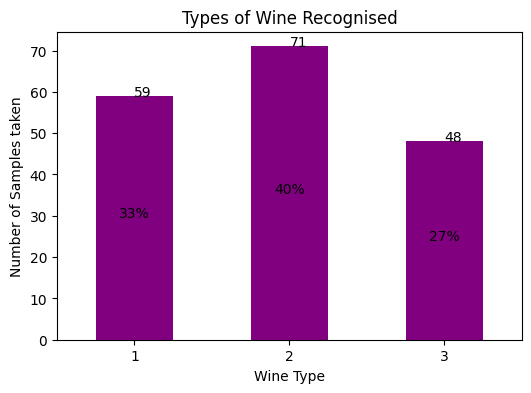

In [12]:
wtype = wine['Wine'].value_counts().sort_index()
total = wtype.sum()
ax = wtype.plot.bar('Wine',color='purple',figsize=(6,4),rot=0)
ax.set_title("Types of Wine Recognised")
ax.set_xlabel("Wine Type")
ax.set_ylabel("Number of Samples taken")
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(h,xy=(x + w/2,h))
    ax.annotate(str(round((h*100)/total)) + "%",xy=(x+w/2,y+h/2),ha='center')

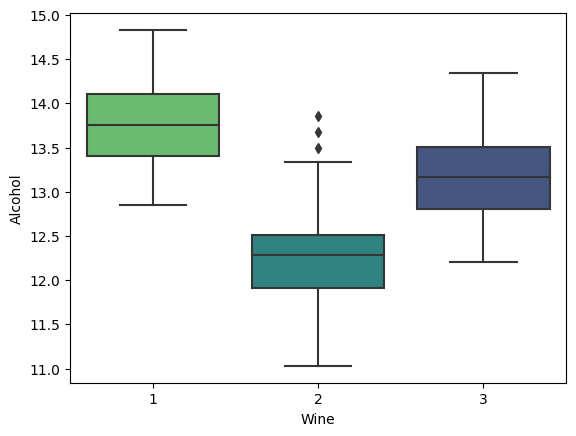

In [15]:
sns.boxplot(y='Alcohol',x='Wine',data=wine,palette='viridis_r')
#alcoholByType = wine.groupby(['Wine'])['Alcohol'].value_counts()
# alcoWineDf = pd.DataFrame({'Wine 1': young.values, 'Adult [18-59 years]': adult.values, 
#                       'Senior [60-80 years]': senior.values},
#                        index=['Male','Female'])
# fig, ax = plt.subplots(figsize=(6, 4))
# axWineAlcohol = sns.countplot(x=alcoholByType.value_counts().values,hue='Wine',data=wine)
# axWineAlcohol.set(
#    title='Alcohol content in Different Wine',
#    xlabel='Alcohol',
#    ylabel='Count of Passengers',
#    #xticklabels = ['First','Second','Third']
# )
# #axWineAlcohol.legend(title='Wine Type', labels=['1','2','3'])
# for p in axWineAlcohol.patches:
#     h = p.get_height()
#     x = p.get_x()
#     w = p.get_width()
#     axWineAlcohol.annotate(h, (x+0.15, h))
plt.show()
# Type2MaxAlcohol = wine[wine['Wine']==2]['Alcohol'].max()
# outliers = np.where(wine[wine['Wine']==2])
# outliers

In [27]:
alcoholByType = wine.groupby(['Wine'])['Alcohol'].value_counts() #get 3 wine groups
wine1 = alcoholByType.get(1).sort_index()
wine2 = alcoholByType.get(2).sort_index()
wine3 = alcoholByType.get(3).sort_index()
alcoWineDf = pd.DataFrame({'Wine 1': wine1, 'Wine 2': wine2,'Wine 3': wine3})
alcoWineDf
# fig, ax = plt.subplots(figsize=(6, 4))
# axWineAlcohol = sns.countplot(x=alcoholByType.value_counts().values,hue='Wine',data=wine)
# axWineAlcohol.set(
#    title='Alcohol content in Different Wine',
#    xlabel='Alcohol',
#    ylabel='Count of Passengers',
#    #xticklabels = ['First','Second','Third']
# )
# axWineAlcohol.legend(title='Wine Type', labels=['1','2','3'])
# for p in axWineAlcohol.patches:
#     h = p.get_height()
#     x = p.get_x()
#     w = p.get_width()
#     axWineAlcohol.annotate(h, (x+0.15, h))
# plt.show()

,Wine 1,Wine 2,Wine 3
Alcohol,,,
11.03,NaN,1.0,NaN
11.41,NaN,1.0,NaN
11.45,NaN,1.0,NaN
11.46,NaN,1.0,NaN
11.56,NaN,1.0,NaN
...,...,...,...
14.37,1.0,NaN,NaN
14.38,2.0,NaN,NaN
14.39,1.0,NaN,NaN


0.74    1
0.89    1
0.90    1
0.92    1
0.94    2
       ..
5.04    1
5.19    1
5.51    1
5.65    1
5.80    1
Name: Malic.acid, Length: 133, dtype: int64


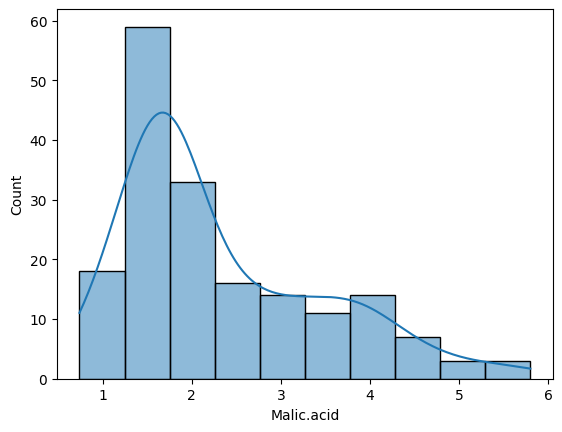

In [38]:
column_valueCounts = getValueCounts(wine,'Malic.acid')
print(column_valueCounts.sort_index())
sns.histplot(x='Malic.acid',data=wine,palette='rainbow',kde=True)
plt.show()

1.36    1
1.70    2
1.71    1
1.75    1
1.82    1
       ..
2.86    1
2.87    1
2.92    1
3.22    1
3.23    1
Name: Ash, Length: 79, dtype: int64


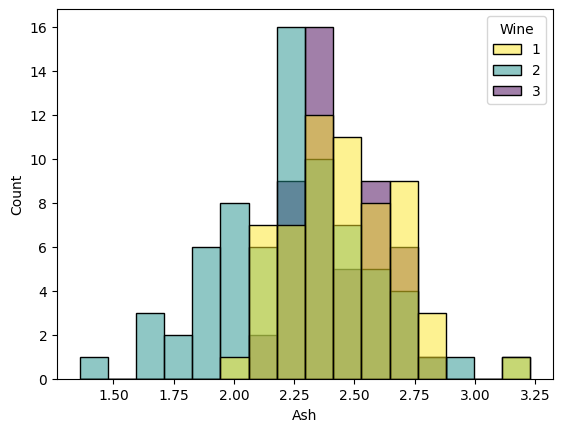

In [44]:
column_valueCounts = getValueCounts(wine,'Ash')
print(column_valueCounts.sort_index())
#sns.countplot(x='Ash',data=wine,palette='viridis_r')
sns.histplot(x='Ash',data=wine,palette='viridis_r',hue='Wine')
plt.show()

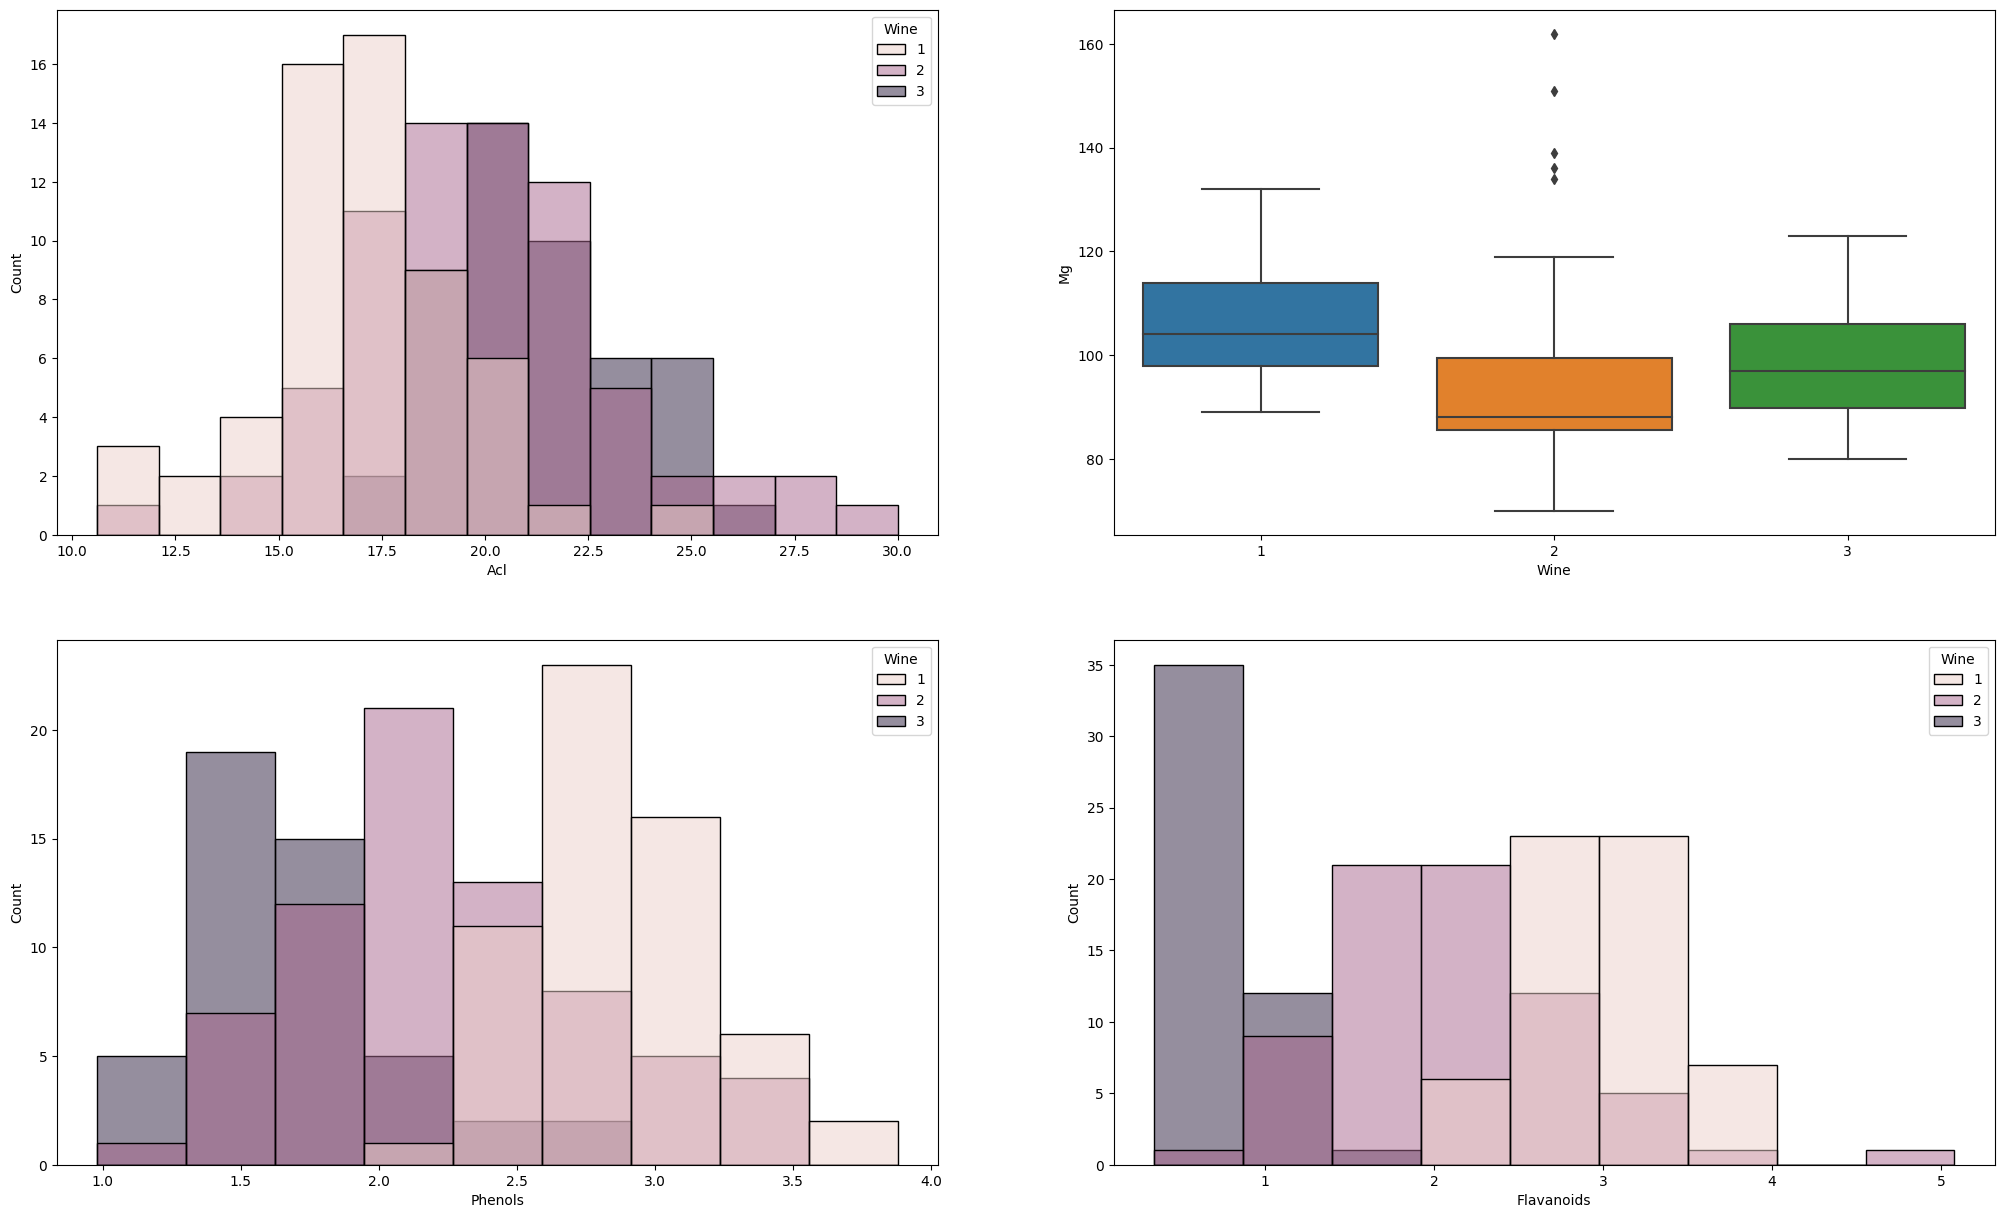

In [66]:
# column_valueCounts = getValueCounts(wine,'Mg')
# print(column_valueCounts.sort_index())
fig, arr = plt.subplots(2,2, figsize=(25,15))
sns.histplot(x='Acl',hue='Wine',data=wine,ax=arr[0][0])
sns.boxplot(y='Mg',x='Wine',data=wine,ax=arr[0][1])
sns.histplot(x='Phenols',hue='Wine',data=wine,ax=arr[1][0])
sns.histplot(x='Flavanoids',hue='Wine',data=wine,ax=arr[1][1])
plt.show()

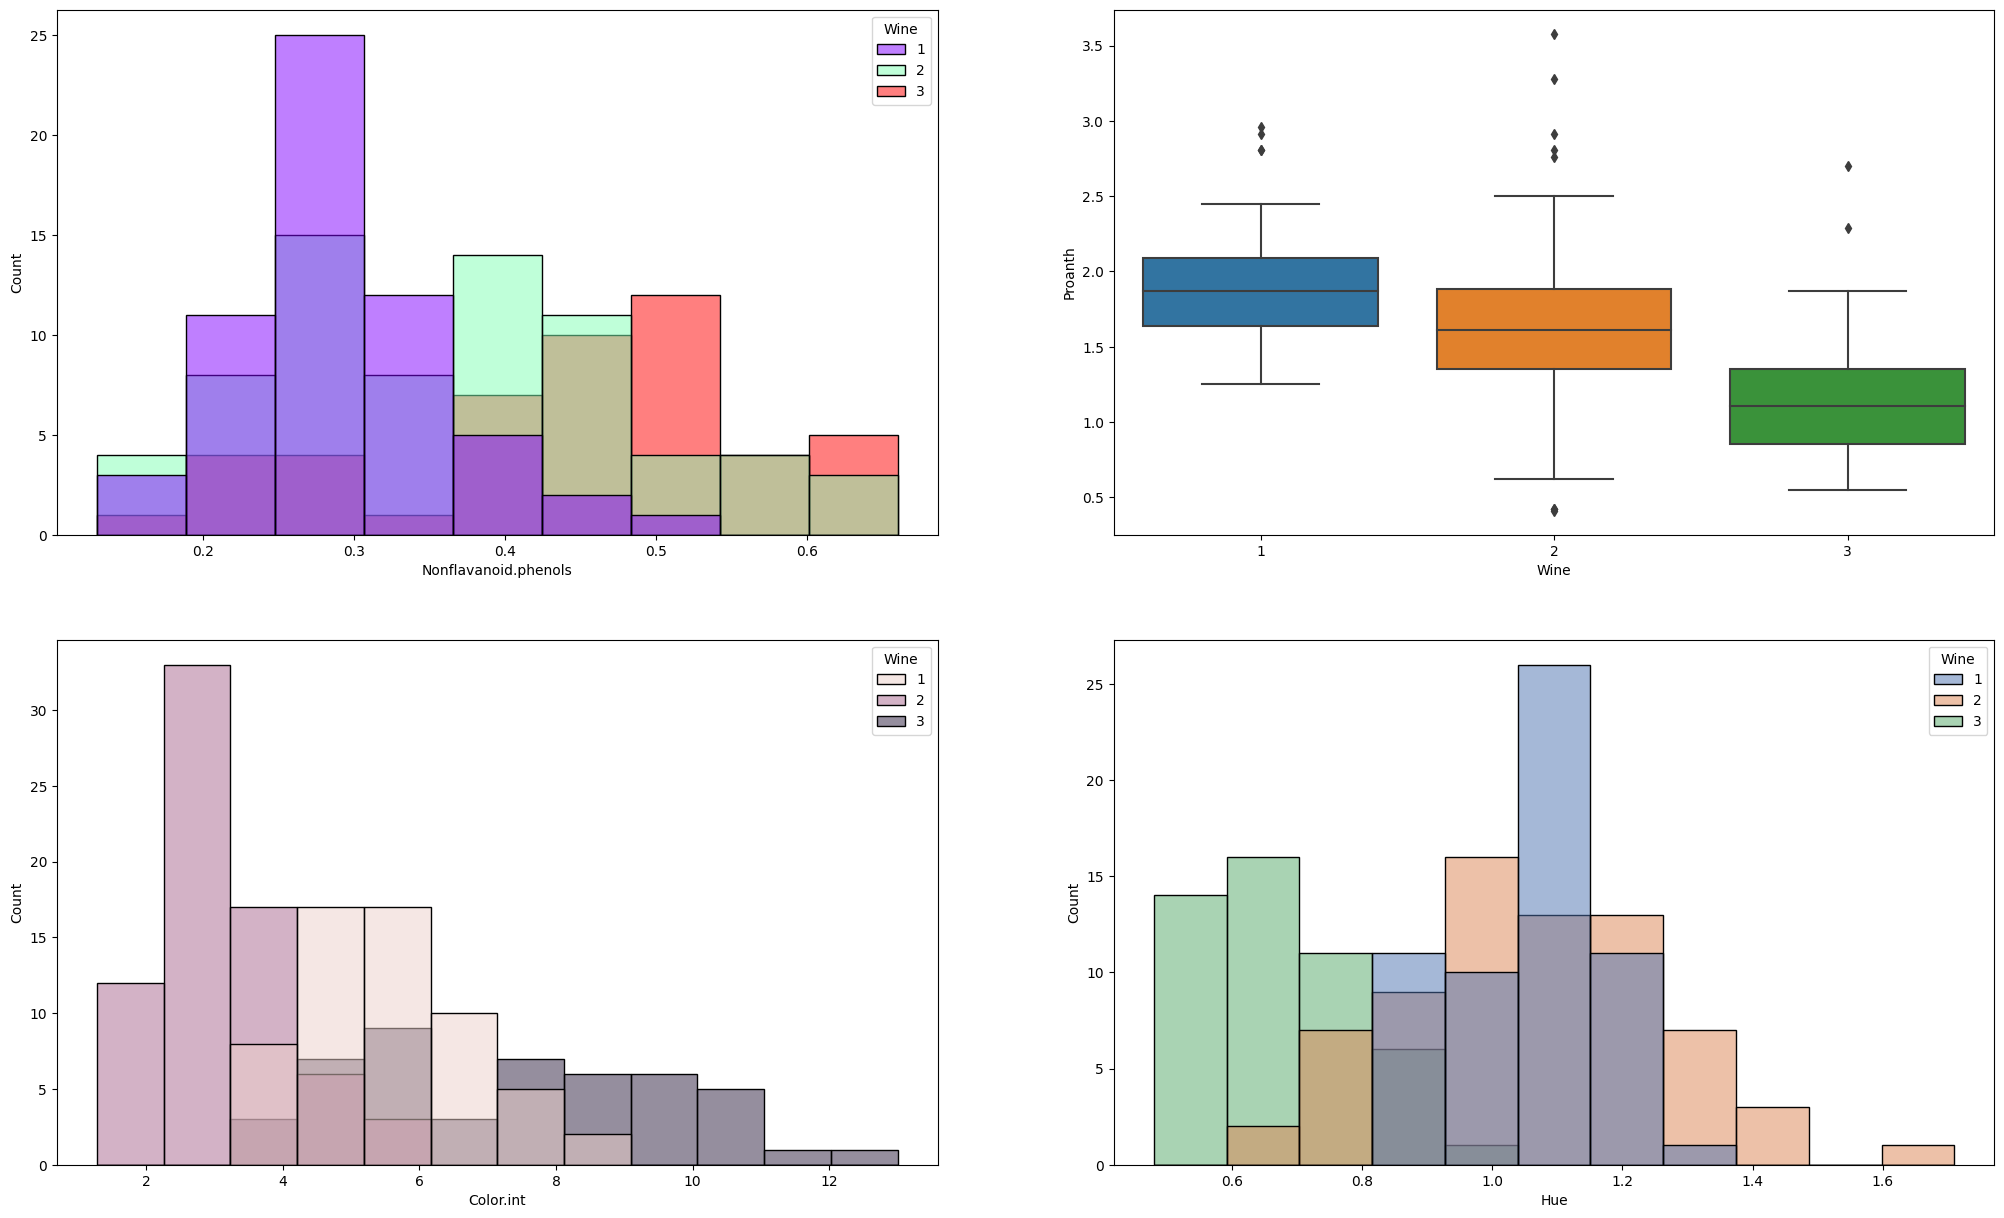

In [88]:
fig, arr = plt.subplots(2,2, figsize=(25,15))
sns.histplot(x='Nonflavanoid.phenols',hue='Wine',data=wine,ax=arr[0][0],palette='rainbow')
sns.boxplot(y='Proanth',x='Wine',data=wine,ax=arr[0][1])
sns.histplot(x='Color.int',hue='Wine',data=wine,ax=arr[1][0])
sns.histplot(x='Hue',hue='Wine',data=wine,ax=arr[1][1],palette='deep')
plt.show()
# column_valueCounts = getValueCounts(wine,'Hue')
# print(column_valueCounts.sort_index())

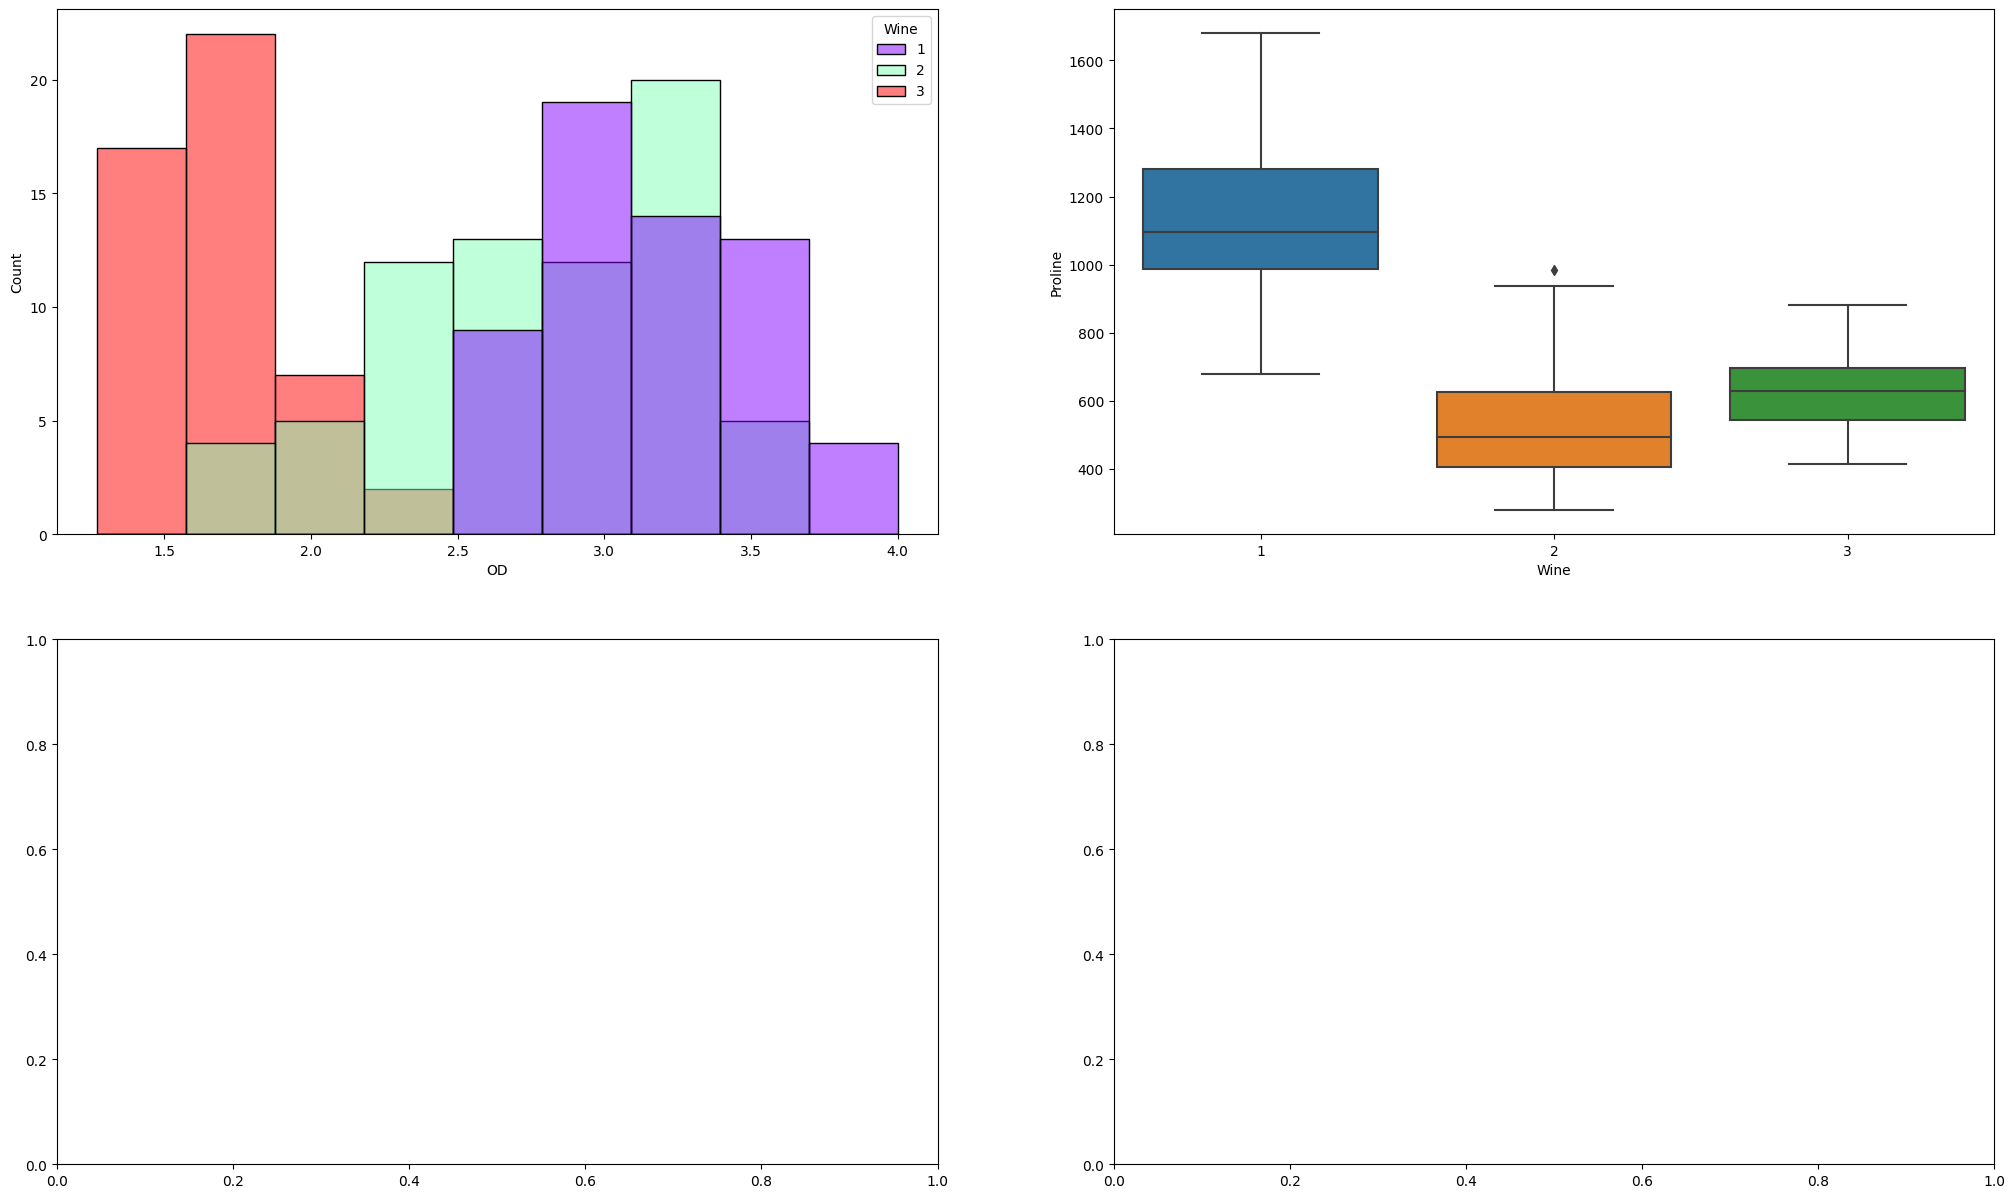

In [83]:
fig, arr = plt.subplots(2,2, figsize=(25,15))
sns.histplot(x='OD',hue='Wine',data=wine,ax=arr[0][0],palette='rainbow')
sns.boxplot(y='Proline',x='Wine',data=wine,ax=arr[0][1])
plt.show()
# column_valueCounts = getValueCounts(wine,'Proline')
# print(column_valueCounts.sort_index())